<a href="https://colab.research.google.com/github/pooja-R-2006/Marketing-AI-stock-predictions/blob/main/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0542
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0023
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0010
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 7.8300e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 7.9408e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.9987e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 7.5556e-04
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.8408e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 7.3764e-04
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 7.0754e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


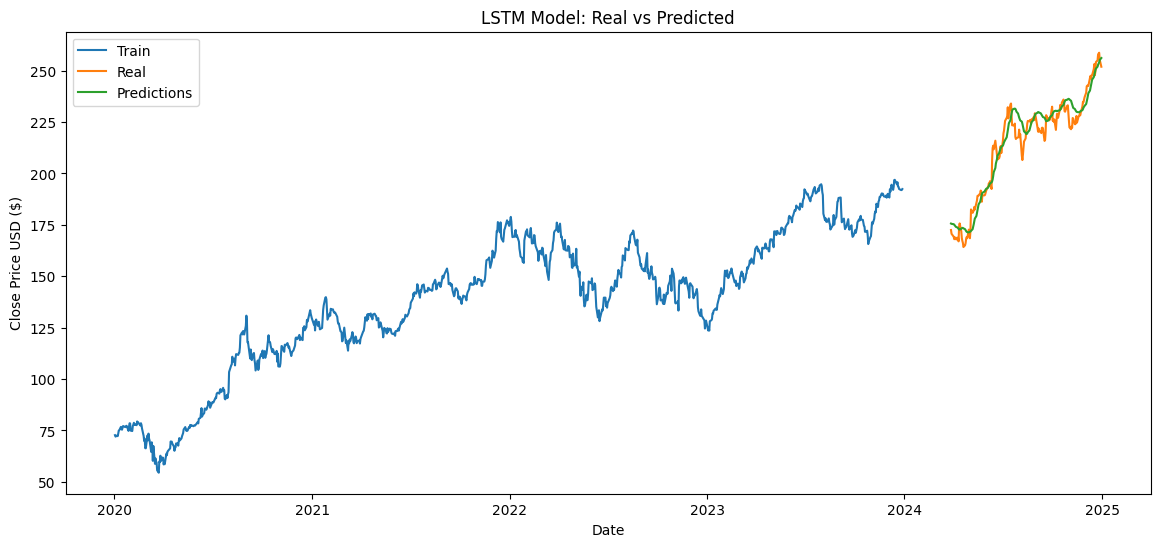

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 1: Download Stock Data
df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data = df[['Close']]  # Only use the 'Close' price

# Step 2: Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# How much data to train on?
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Step 3: Create sequences
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape input for LSTM [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 4: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10)

# Step 6: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Step 7: Plot Real vs Predicted
train = data[:train_size]
valid = data[train_size:]
valid = valid.iloc[60:].copy()  # Because of 60 timestep shift
valid['Predictions'] = predictions

plt.figure(figsize=(14,6))
plt.title('LSTM Model: Real vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Real', 'Predictions'])
plt.show()